In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM

In [126]:
df = pd.read_csv('EURUSD=X.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4952,2024-02-19,1.078446,1.078981,1.076299,1.078493,1.078493,0.0
4953,2024-02-20,1.077540,1.083858,1.076252,1.077540,1.077540,0.0
4954,2024-02-21,1.081315,1.082251,1.079191,1.081315,1.081315,0.0
4955,2024-02-22,1.082040,1.088625,1.080509,1.082040,1.082040,0.0
4956,2024-02-23,1.082567,1.083940,1.081373,1.082567,1.082567,0.0


In [127]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4929.000000,4929.000000,4929.000000,4929.000000,4929.000000,4929.0
mean,1.234610,1.239142,1.229627,1.234615,1.234615,0.0
std,0.130545,0.131303,0.130891,0.130537,0.130537,0.0
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0
25%,1.121479,1.124999,1.117818,1.121579,1.121579,0.0
50%,1.217093,1.221899,1.213342,1.217256,1.217256,0.0
75%,1.334258,1.338509,1.328904,1.334401,1.334401,0.0
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0


In [128]:
df.dropna(inplace=True)

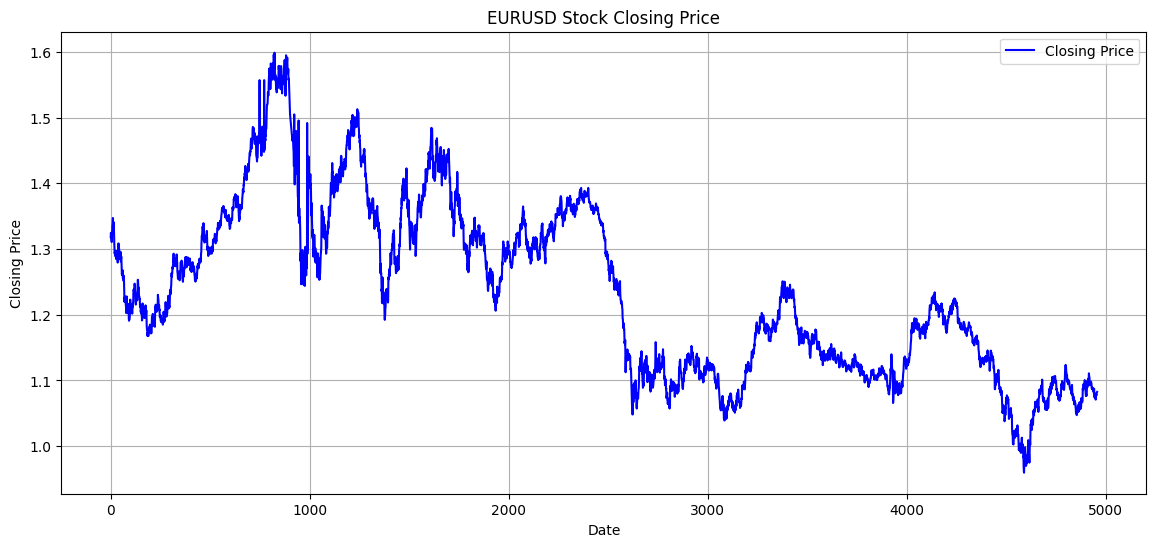

In [129]:
plt.figure(figsize=(14, 6),dpi = 100)
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('EURUSD Stock Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [130]:
df.set_index('Date', inplace=True)
data = df['Close'].values.reshape(-1, 1)
data

array([[1.318305],
       [1.324609],
       [1.321702],
       ...,
       [1.081315],
       [1.08204 ],
       [1.082567]])

In [131]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [132]:
sequence_length = 10

X, y = [], []

for i in range(len(data) - sequence_length):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length])


In [133]:
X = np.array(X)
y = np.array(y)

In [134]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [135]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length,1)))
model.add(LSTM(50))
model.add(Dense(1))

In [136]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
99/99 [==============================] - 5s 20ms/step - loss: 0.0179 - val_loss: 4.4429e-04
Epoch 2/200
99/99 [==============================] - 1s 6ms/step - loss: 8.1022e-04 - val_loss: 2.4156e-04
Epoch 3/200
99/99 [==============================] - 1s 6ms/step - loss: 7.8445e-04 - val_loss: 2.3143e-04
Epoch 4/200
99/99 [==============================] - 1s 6ms/step - loss: 7.7869e-04 - val_loss: 2.2636e-04
Epoch 5/200
99/99 [==============================] - 1s 6ms/step - loss: 7.7272e-04 - val_loss: 2.2286e-04
Epoch 6/200
99/99 [==============================] - 1s 6ms/step - loss: 7.5039e-04 - val_loss: 2.4168e-04
Epoch 7/200
99/99 [==============================] - 1s 6ms/step - loss: 7.4092e-04 - val_loss: 2.9604e-04
Epoch 8/200
99/99 [==============================] - 1s 6ms/step - loss: 7.8100e-04 - val_loss: 2.1721e-04
Epoch 9/200
99/99 [==============================] - 1s 6ms/step - loss: 7.4079e-04 - val_loss: 2.1579e-04
Epoch 10/200
99/99 [====================

In [142]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)
y_pred[:10,:]

31/31 [==============================] - 0s 2ms/step


array([[1.0834744],
       [1.0920407],
       [1.0933383],
       [1.0986279],
       [1.0959767],
       [1.0919243],
       [1.0914892],
       [1.0987169],
       [1.1021028],
       [1.1080766]], dtype=float32)

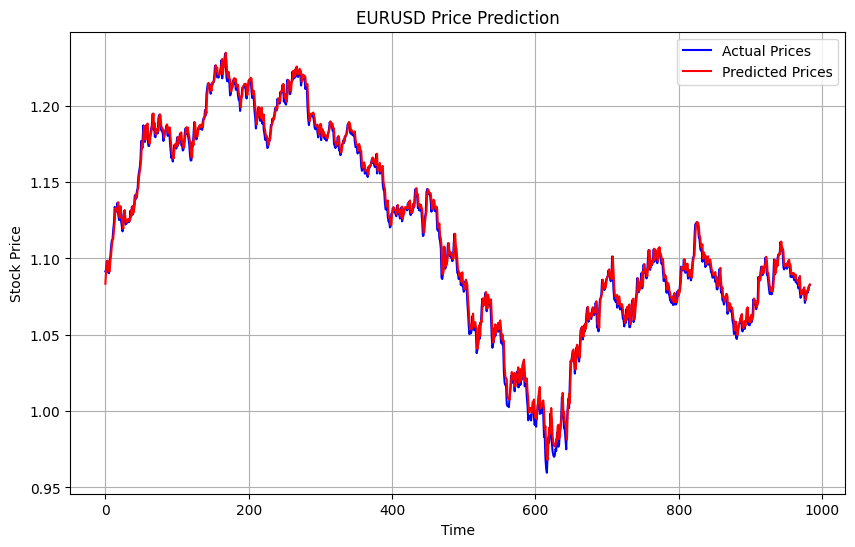

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('EURUSD Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

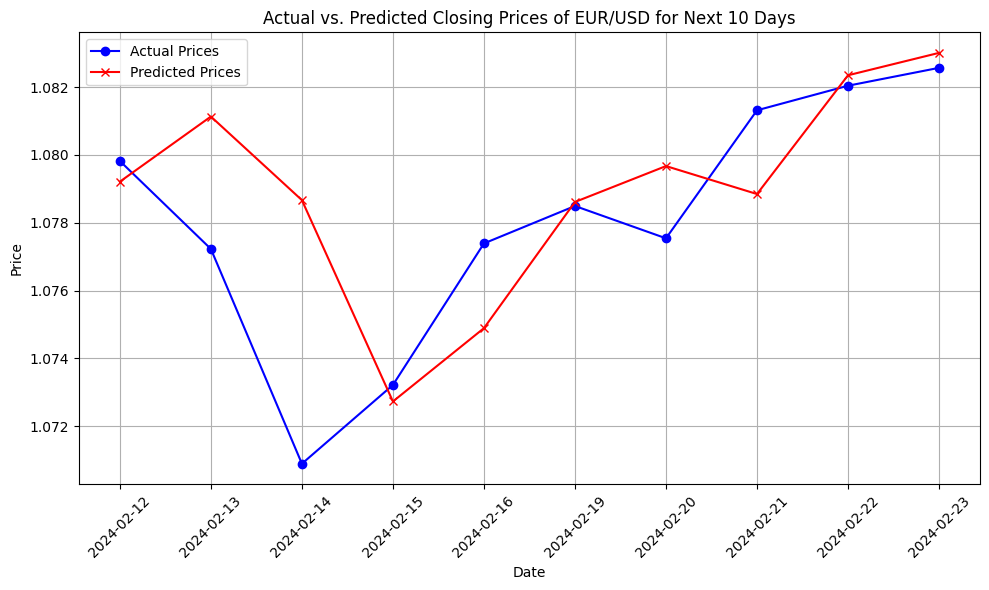

In [140]:
# Extract the actual closing prices for the next 10 days
actual_prices = df['Close'].iloc[-future_days:]

# Combine actual and predicted prices into a single DataFrame
combined_df = pd.DataFrame({'Date': next_dates, 'Actual Price': actual_prices.values, 'Predicted Price': y_pred.flatten()})

# Plot the actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(combined_df['Date'], combined_df['Actual Price'], label='Actual Prices', color='blue', marker='o')
plt.plot(combined_df['Date'], combined_df['Predicted Price'], label='Predicted Prices', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Closing Prices of EUR/USD for Next 10 Days')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 17ms/step


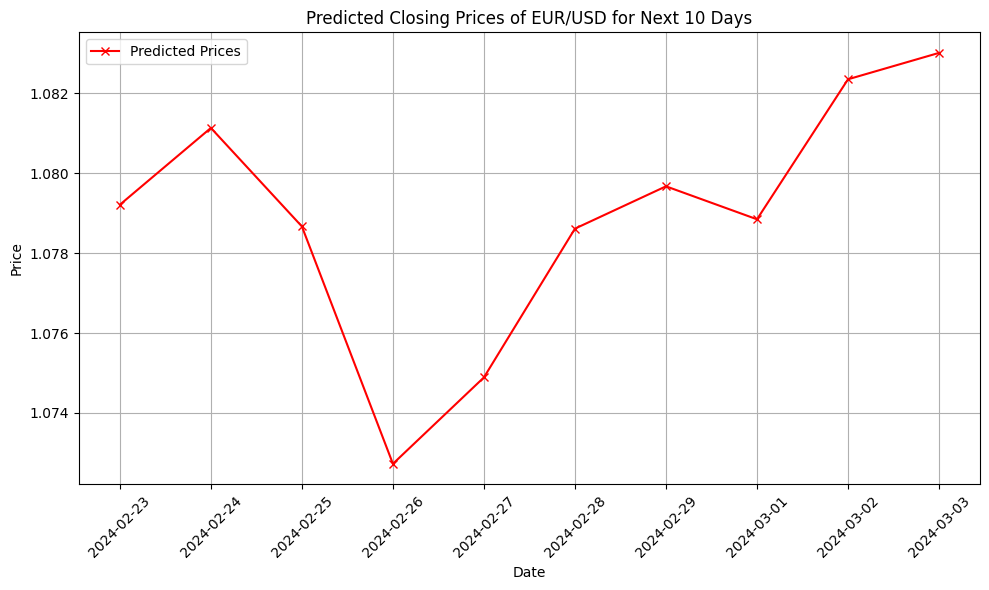

In [141]:
import datetime

# Define the starting date
start_date = datetime.datetime(2024, 2, 23)

# Generate dates for the next 10 days
future_dates = [start_date + datetime.timedelta(days=i) for i in range(10)]

# Convert the dates to strings
next_dates = [date.strftime('%Y-%m-%d') for date in future_dates]

# Reshape the data for prediction
X_future = X_test[-future_days:]

# Predict the closing prices for the next 10 days
y_pred = model.predict(X_future)
y_pred = scaler.inverse_transform(y_pred).flatten()

# Create a DataFrame with the predicted closing prices and dates
prediction_df = pd.DataFrame({'Date': next_dates, 'Predicted Price': y_pred})

# Plot the predicted prices
plt.figure(figsize=(10, 6))
plt.plot(prediction_df['Date'], prediction_df['Predicted Price'], label='Predicted Prices', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted Closing Prices of EUR/USD for Next 10 Days')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
